In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from collections import defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random

In [2]:
lemmatizer = WordNetLemmatizer()

def lemma(word):
    word = word.strip()

    noun = lemmatizer.lemmatize(word)
    if noun != word:
        return noun

    adjective = lemmatizer.lemmatize(word, pos="a")
    if adjective != word:
        return adjective

    verb = lemmatizer.lemmatize(word, pos="v")
    if verb != word:
        return verb

    return word

stopwordDict = defaultdict(int)
for sw in stopwords.words("english"):
    stopwordDict[sw] += 1

In [3]:
import pymongo
# client = pymongo.MongoClient(host="128.195.180.83",
#                              port=27939,
#                              username="db_writer",
#                              password="ucidsplab_dbwriter"
#                              )

# db = client.cloudflare_crawled_data

client = pymongo.MongoClient(host="128.195.180.83",
                             port=27939,
                             username="db_writer",
                             password="ucidsplab_dbwriter"
                             )
db = client.cloudflare_crawled_data

corpus, corpus_index, url_list = [], [], []
startPage, endPage = 100, 1099

for i in range(startPage, endPage + 1):
    col_name = "purepage" + str(i)
    collection = db[col_name]
    
    for page in collection.find():
        if not page["DNS_Related"]:
            continue
        
        if "Other Languages" in page["labels"]:
            continue
            
        unclassified = False
        for label in page["labels"]:
            if label == "Others":
                unclassified = True
                
        if len(page["labels"]) == 1 and page["labels"] == ["General DNS & Network Issues"]:
            unclassified = True
            
        if unclassified:
            
            unprocessed, processed = page["original_post"], []
            for word in unprocessed.split(" "):
                lem = lemma(word.strip().lower())
            
                try:
                    _ = int(lem)
                    continue
                except:
                    pass
                
                if lem not in stopwordDict:
                    flag = False
                    for char in lem:
                        if char < "a" or char > "z":
                            flag = True
                    if not flag:
                        processed.append(lem)
                    
            corpus.append(" ".join(processed))
            corpus_index.append(page["title"])
            url_list.append(page["url"])
             
    
print(corpus)
print(len(corpus))

['hello problem reach website relate cloudflare try connect cloudflare plugin wp website global tag believe cause thing work sure since file manager rename cloudflare plugin deactivate plugin still cant see website www ringsofsweden com thank help', 'happen use www non www version together web example http official page http www official page', 'kb get try transfer moddedphones com', 'wa tell transfer com domain cost transfer check paypal appear charge usd difference miss', 'kb use roundcube cpanel default please give solution problem', 'cloudflare warp work window build connection fail error occur connect warp uninstalling fail cloudflare folder c programfiles remove manually warp svc exe cause memory leak keep run background reach gb usage fix stop remove folder uninstall warp try instal warp late installer also use chocolatey issue persist fix issue', 'registrar dash ticket try add spf record include bookend constant contact squarespace cannot remove domain record continue receive e

In [4]:
#vectorizer = TfidfVectorizer(min_df = 5, max_features = 8000, stop_words = "english")
vectorizer = TfidfVectorizer(min_df = 3,
                             max_features = 10000)


# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
dimensions = vectorizer.get_feature_names()
dimensions

['abc',
 'ability',
 'able',
 'absolutely',
 'abuse',
 'academy',
 'accept',
 'acceptable',
 'access',
 'accessible',
 'accident',
 'accidentally',
 'accomplish',
 'accord',
 'accordingly',
 'account',
 'accurate',
 'achieve',
 'across',
 'act',
 'action',
 'activate',
 'activation',
 'active',
 'activity',
 'actual',
 'actually',
 'ad',
 'adapter',
 'add',
 'addeventlistener',
 'addition',
 'additional',
 'addon',
 'address',
 'adguard',
 'adjust',
 'admin',
 'administrator',
 'adult',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'advise',
 'ae',
 'afaik',
 'affect',
 'afraid',
 'afternoon',
 'age',
 'agency',
 'agent',
 'ago',
 'ahead',
 'ai',
 'aire',
 'airtel',
 'ajax',
 'aka',
 'akamai',
 'al',
 'alan',
 'alert',
 'alex',
 'algo',
 'algorithm',
 'alguien',
 'alguna',
 'alias',
 'alle',
 'allow',
 'almost',
 'alone',
 'along',
 'alot',
 'alpha',
 'already',
 'also',
 'alt',
 'alternate',
 'alternative',
 'although',
 'always',
 'amaze',
 'amazon',
 'america',
 'among',
 'amo

In [58]:
num_posts, dimensions=X.shape
num_posts, dimensions

(3565, 2302)

In [5]:
df = pd.DataFrame(X.T.todense(), index=vectorizer.get_feature_names(), columns=corpus_index)
df

,my-website-is-not-loading_331419,official-page_332106,cant-transfer-domain_332083,domain-transfer-fee-not-as-advertised_331991,email-not-sending-but-mails-receiving_331971,cloudflare-warp-not-connecting-and-memory-leak_313660,trying-to-add-to-our-spf-record-without-removing-a-domain-but-keep-exceeding-10-lookup-limit_331949,txt-ptr-srv-records-not-updating_331941,pages-custom-domain-inactive-error_314276,page-rule-not-working-for-forwarding-url_331797,...,warp-not-tunnelling-my-queries_170808,domain-expiration-date_102036,1-1-1-1-is-not-reachable-from-the-fastweb-s-p-a-network_171101,polish-active-not-working-no-headers_171009,dns-update-put-method-with-api-token-not-supported_169579,multiregion-access_171025,getting-pending-nameserver-update-for-weeks_170940,request-time-out_168073,dns-resolution-error-error-1001_164249,heroku-no-such-app-error_170591
abc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.153689,0.000000,0.0,0.0,0.0,0.0,0.0
absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198333,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
abuse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
youtube,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
za,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
clusterNum = 4
cluster_model = KMeans(n_clusters=clusterNum)
labels = cluster_model.fit_predict(X)
labels

array([3, 1, 0, ..., 3, 3, 0])

In [8]:
labelDict, urlDict = defaultdict(list), {}
for i in range(len(corpus_index)):
#     print(corpus_index[i])
#     print(labels[i])
    labelDict[labels[i]].append(corpus_index[i])
    urlDict[corpus_index[i]] = url_list[i]

for label in labelDict:
    print(label, end = ": ")
    for title in labelDict[label]:
        print("\t{0}, {1}".format(title, urlDict[title]))
    print("")
    

3: 	my-website-is-not-loading_331419, https://community.cloudflare.com/t/my-website-is-not-loading/331419
	cloudflare-warp-not-connecting-and-memory-leak_313660, https://community.cloudflare.com/t/cloudflare-warp-not-connecting-and-memory-leak/313660
	trying-to-add-to-our-spf-record-without-removing-a-domain-but-keep-exceeding-10-lookup-limit_331949, https://community.cloudflare.com/t/trying-to-add-to-our-spf-record-without-removing-a-domain-but-keep-exceeding-10-lookup-limit/331949
	txt-ptr-srv-records-not-updating_331941, https://community.cloudflare.com/t/txt-ptr-srv-records-not-updating/331941
	warp-client-on-linux-not-http-3-enabled_331573, https://community.cloudflare.com/t/warp-client-on-linux-not-http-3-enabled/331573
	need-help-with-page-rule-redirects_331653, https://community.cloudflare.com/t/need-help-with-page-rule-redirects/331653
	hello-dns-errors_330915, https://community.cloudflare.com/t/hello-dns-errors/330915
	new-site-added-but-not-working-what-am-i-missing-here_331

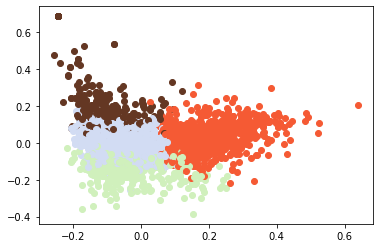

In [62]:
matrix = X.todense()
reduced_data = PCA(n_components=2).fit_transform(matrix)

number_of_colors = clusterNum

colors = ["#"+ "".join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

fig, ax = plt.subplots()

for i, dot in enumerate(reduced_data):
    x, y = dot[0], dot[1]
    if x > 0.8:
        continue
    color = colors[labels[i]]
    ax.scatter(x, y, c=color)

# for c in colors:
#     ax.legend()

plt.show()

In [9]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
metrics.silhouette_score(X, labels, metric='euclidean')

0.00871819478835268